正解率:  96.0 %


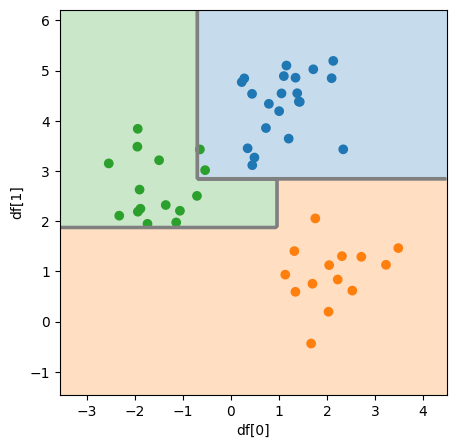

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_boundary(model, X, y, target, xlabel, ylabel):
    cmap_dots = ListedColormap(["#1f77b4", "#ff7f0e", "#2ca02c"])
    cmap_fills = ListedColormap(["#c6dcec", "#ffdec2", "#cae7ca"])
    plt.figure(figsize = (5, 5))
    if model:
        XX, yy = np.meshgrid(
            np.linspace(X.min() - 1, X.max() + 1, 200),
            np.linspace(y.min() - 1, y.max() + 1, 200)
        )
        pred = model.predict(np.c_[XX.ravel(), yy.ravel()]).reshape(XX.shape)
        plt.pcolormesh(XX, yy, pred, cmap = cmap_fills, shading = "auto")
        plt.contour(XX, yy, pred, colors = "gray")
        plt.scatter(X, y, c = target, cmap = cmap_dots)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

X, y = make_blobs(
    random_state=0,
    n_features=2,
    centers=3,
    cluster_std=0.6,
    n_samples=200
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = DecisionTreeClassifier(max_depth=None, random_state=0)
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率: ", score*100, "%")

df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df[0]", "df[1]")

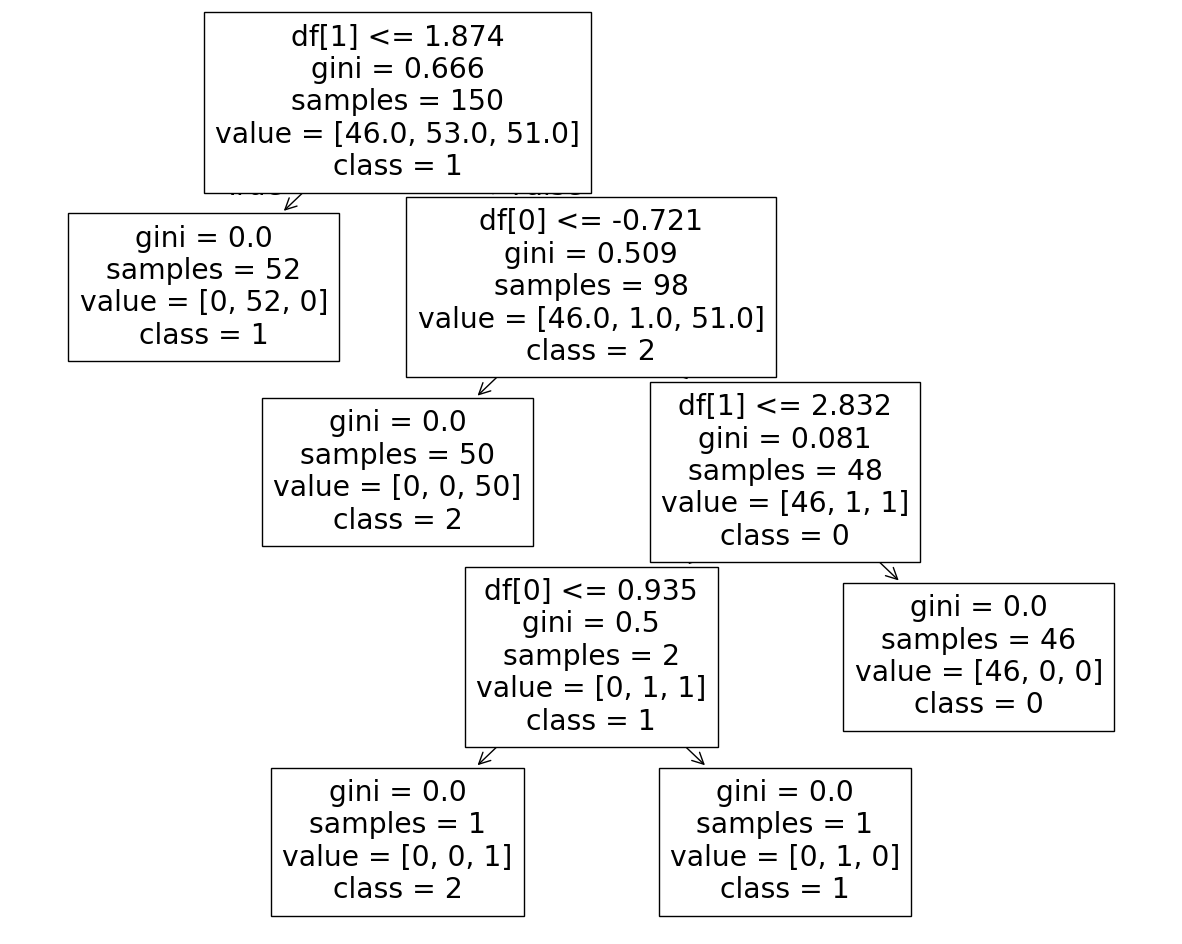

In [7]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,12))
plot_tree(
    model,
    feature_names=["df[0]", "df[1]"],
    class_names=["0", "1", "2"]
)
plt.show()

正解率:  92.0 %


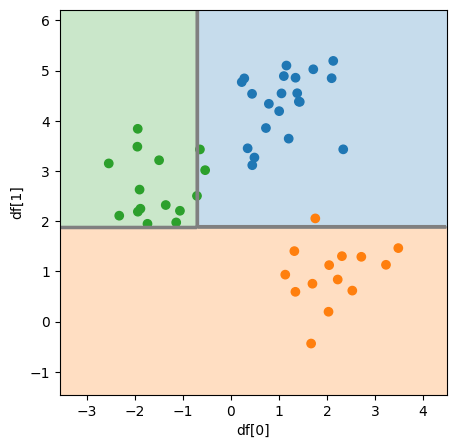

In [8]:
model = DecisionTreeClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率: ", score*100, "%")

df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df[0]", "df[1]")

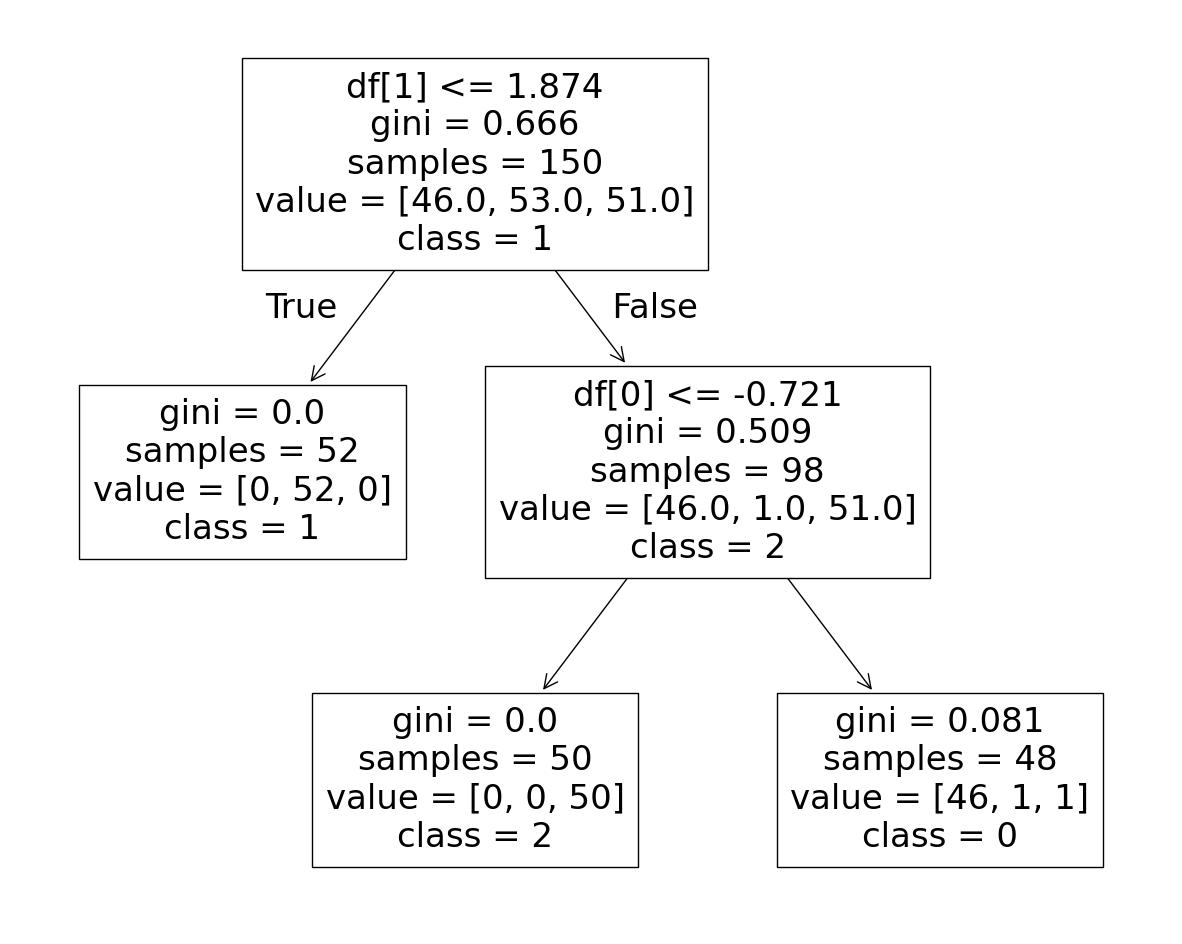

In [9]:
plt.figure(figsize=(15,12))
plot_tree(
    model,
    feature_names=["df[0]", "df[1]"],
    class_names=["0", "1", "2"]
)
plt.show()